In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mlp-term-2-2025-kaggle-assignment-3/sample_submission.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-3/train.csv
/kaggle/input/mlp-term-2-2025-kaggle-assignment-3/test.csv


# **Importing Necessary Modules**

In [2]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, MaxAbsScaler
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier, Perceptron, MultiTaskLasso, PassiveAggressiveClassifier
from sklearn.metrics import r2_score, accuracy_score
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import HistGradientBoostingClassifier, VotingClassifier, BaggingClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


# **Load the datatset**

In [3]:
df = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-3/train.csv")
df

,id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,0,McDonald's,Fast food restaurant,"9814 International Dr, Orlando, FL 32819, Unit...",28.423814,-81.461242,"5,468",11 months ago,"Very nice staff, good place to get all your fa...",5
1,1,McDonald's,Fast food restaurant,"1100 N US Hwy 377, Roanoke, TX 76262, United S...",33.009318,-97.222925,998,10 months ago,"I think the morning shift are one of, if not t...",5
2,2,McDonald's,Fast food restaurant,"490 8th Ave, New York, NY 10001, United States",40.752529,-73.992876,"3,902",a year ago,Horrible! Avoid this place at night. Unsafe. ...,1
3,3,McDonald's,Fast food restaurant,"111 Madison St, Oak Park, IL 60302, United States",41.879656,-87.777913,"1,454",9 months ago,Employees too busy window licking to get any o...,1
4,4,McDonald's,Fast food restaurant,"5725 W Irlo Bronson Memorial Hwy, Kissimmee, F...",28.333508,-81.513738,"5,566",4 years ago,I'm sorry to give only one star. But during ou...,1
...,...,...,...,...,...,...,...,...,...,...
26495,26495,McDonald's,Fast food restaurant,"1650 Washington Ave, Miami Beach, FL 33139, Un...",25.790295,-80.132077,"4,922",a year ago,Be careful. Rude sketchy employees.They will t...,1
26496,26496,McDonald's,Fast food restaurant,"1540 2nd St, Santa Monica, CA 90405, United St...",34.012219,-118.494540,"3,380",4 years ago,I expect crowding because it's close to the be...,2
26497,26497,McDonald's,Fast food restaurant,"210 5th S, Salt Lake City, UT 84106, United St...",40.759057,-111.897383,"3,243",6 months ago,Salt Lake City fast becoming a toilet.\nElect ...,1
26498,26498,McDonald's,Fast food restaurant,"429 7th Ave, New York, NY 10001, United States",40.750506,-73.990583,"2,052",3 years ago,Good food,4


# **Data Types of the columns**

In [4]:
df.columns

Index(['id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26500 entries, 0 to 26499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             26500 non-null  int64  
 1   store_name     26500 non-null  object 
 2   category       26500 non-null  object 
 3   store_address  26500 non-null  object 
 4   latitude       25976 non-null  float64
 5   longitude      25976 non-null  float64
 6   rating_count   26500 non-null  object 
 7   review_time    26500 non-null  object 
 8   review         26500 non-null  object 
 9   rating         26500 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 2.0+ MB


# **Descriptive statistics of Numerical Columns**

In [6]:
df.describe()

,id,latitude,longitude,rating
count,26500.000000,25976.000000,25976.000000,26500.000000
mean,13249.500000,34.427152,-90.659226,3.130642
std,7650.035403,5.336112,16.588603,1.615425
min,0.000000,25.790295,-121.995421,1.000000
25%,6624.750000,28.655350,-97.792874,1.000000
50%,13249.500000,33.931261,-81.471414,3.000000
75%,19874.250000,40.727401,-75.399919,5.000000
max,26499.000000,44.981410,-73.459820,5.000000


# **Identifying NULL/Missing Values**

In [7]:
df.isnull().sum()

id                 0
store_name         0
category           0
store_address      0
latitude         524
longitude        524
rating_count       0
review_time        0
review             0
rating             0
dtype: int64

## **Only Latitude and Longitude Fields have NULL/Missing Values**

# **Handling Missing Values**

In [8]:
imputer = SimpleImputer(strategy="median")

# **Identifying Duplicates**

In [9]:
df[df.duplicated()]

,id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating


## **There are no Duplicates in the dataset**

# **Identifying Outliers**

In [10]:
df["latitude "]

0        28.423814
1        33.009318
2        40.752529
3        41.879656
4        28.333508
           ...    
26495    25.790295
26496    34.012219
26497    40.759057
26498    40.750506
26499    28.333508
Name: latitude , Length: 26500, dtype: float64

In [11]:
def iqr(x):
    return (x.quantile(0.75)-x.quantile(0.25))

In [12]:
df2 = df[df.select_dtypes(include=["float64", "int64"]).columns]
df2
outlier_count = {}
for i in df2.columns.tolist():
    q = iqr(df2[i])
    outlier_count[i] = (df2[((df2[i] < (df2[i].quantile(0.25) - 1.5*q)) | (df2[i] < (df2[i].quantile(0.75) + 1.5*q)))][i].count())
print(outlier_count)

{'id': 26500, 'latitude ': 25976, 'longitude': 25976, 'rating': 26500}


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


# **Visualisation of Data Attributes**

In [13]:
df.columns

Index(['id', 'store_name', 'category', 'store_address', 'latitude ',
       'longitude', 'rating_count', 'review_time', 'review', 'rating'],
      dtype='object')

## **Function to dispaly details of attributes and its unique values**

In [14]:
def display_details_of_attribute(i):
    print("List of unique values in " + i + " attribute: ", df[i].unique())
    print("Total number of unique values: ", str(int(df[i].nunique())))

## **'store_name' variable**

In [15]:
display_details_of_attribute("store_name")

List of unique values in store_name attribute:  ["McDonald's" "ýýýMcDonald's"]
Total number of unique values:  2


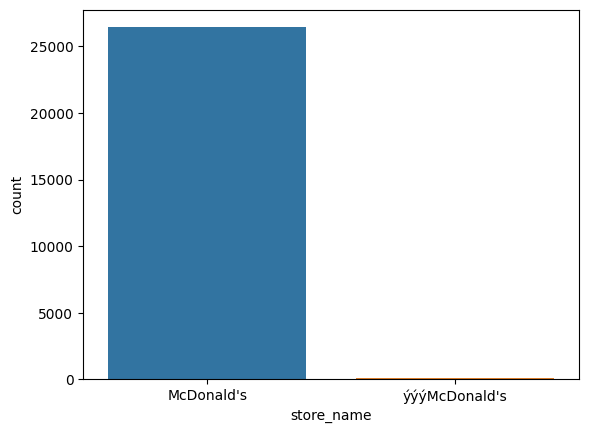

In [16]:
sns.countplot(x = df["store_name"])
plt.show()

## **'longitude' variable**

In [17]:
display_details_of_attribute("longitude")

List of unique values in longitude attribute:  [ -81.4612421  -97.2229254  -73.9928762  -87.7779131  -81.5137384
 -117.2494697  -98.6345801  -97.7928744  -97.6606295  -96.8122859
  -73.9932643 -118.2382063  -81.3426916 -117.1780115  -74.9810994
 -118.4945396          nan  -81.4714142  -73.990583   -73.8124604
  -80.1320774 -118.3679036 -115.1758223  -73.4598199 -121.9954211
  -77.1850548  -74.1614754 -111.8973832  -80.1890981  -75.3999187
  -97.3076518  -74.0011677  -77.0442355  -81.4051029 -118.2829548
  -73.9890961  -77.0289132  -74.0099791 -118.4259996  -73.9882797]
Total number of unique values:  39


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


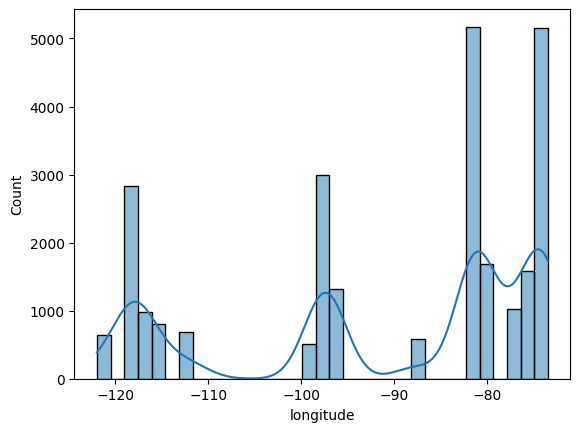

In [18]:
sns.histplot(x=df["longitude"], kde=True)
plt.show()

## **'latitude ' variable**

In [19]:
display_details_of_attribute("latitude ")

List of unique values in latitude  attribute:  [28.4238144 33.0093179 40.7525294 41.8796564 28.3335081 32.7976607
 29.6762669 30.4607176 30.3291349 32.7445961 40.7291264 34.0352699
 28.6553497 32.8206541 39.8520594 34.0122192        nan 28.4503866
 40.7505058 40.7274006 25.7902955 34.1525074 36.0902437 44.9814099
 37.3854949 38.8128231 40.7719101 40.7590573 25.8099996 40.9220806
 32.9580411 40.7185138 38.9054561 28.3999863 33.9312613 40.750831
 38.8969797 40.7093746 34.0565932 40.7188385]
Total number of unique values:  39


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


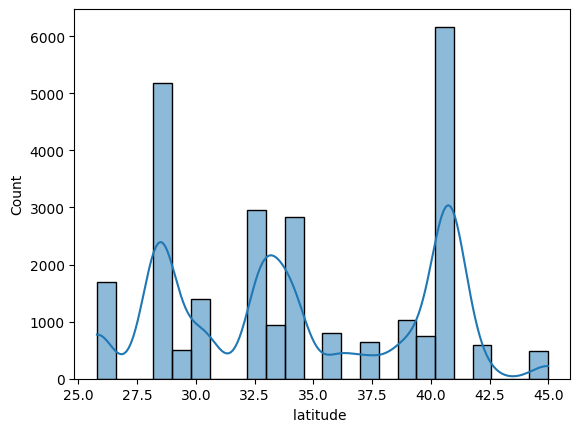

In [20]:
sns.histplot(x=df["latitude "], kde=True)
plt.show()

## **'category' variable**

In [21]:
display_details_of_attribute("category")

List of unique values in category attribute:  ['Fast food restaurant']
Total number of unique values:  1


<Axes: xlabel='category', ylabel='count'>

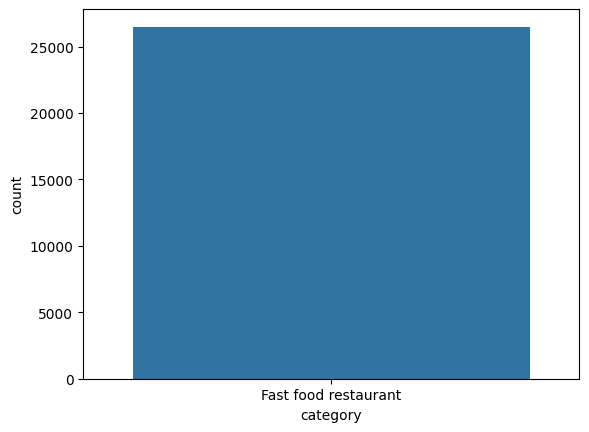

In [22]:
sns.countplot(x=df["category"])

## **'rating_count' variable**

In [23]:
display_details_of_attribute("rating_count")

List of unique values in rating_count attribute:  ['5,468' '998' '3,902' '1,454' '5,566' '1,159' '1,460' '1,240' '1,406'
 '2,657' '5,466' '5,567' '1,670' '2,614' '1,617' '550' '933' '3,380'
 '2,175' '19,671' '2,052' '2,193' '4,922' '1,794' '999' '1,618' '2,658'
 '1,795' '3,381' '2,365' '1,306' '1,562' '595' '1,564' '3,243' '2,808'
 '1,028' '957' '2,810' '3,196' '1,269' '1,861' '2,722' '1,565' '263'
 '1,307' '1,542' '19,682' '5,186' '2,251' '2,348']
Total number of unique values:  51


In [24]:
df["rating_count"]

0        5,468
1          998
2        3,902
3        1,454
4        5,566
         ...  
26495    4,922
26496    3,380
26497    3,243
26498    2,052
26499    5,566
Name: rating_count, Length: 26500, dtype: object

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


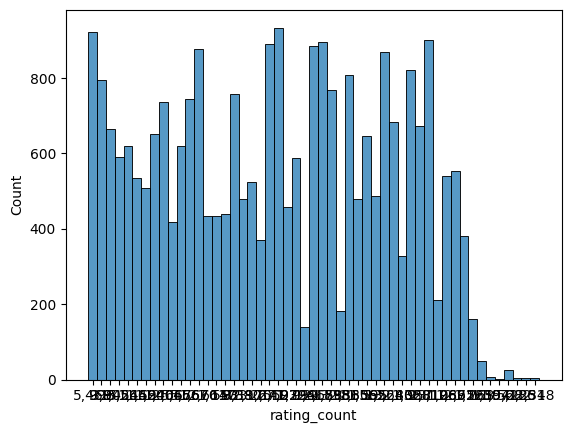

In [25]:
sns.histplot(x=df["rating_count"])
plt.show()

## **'rating' variable**

In [26]:
display_details_of_attribute("rating")

List of unique values in rating attribute:  [5 1 4 3 2]
Total number of unique values:  5


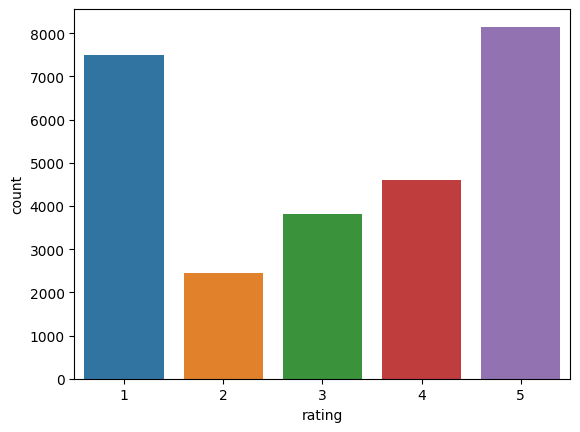

In [27]:
sns.countplot(x=df["rating"])
plt.show()

# **Preprocessing - Rectifying, Scaling, Encoding and Vectorizing Attributes**

In [28]:
df2

,id,latitude,longitude,rating
0,0,28.423814,-81.461242,5
1,1,33.009318,-97.222925,5
2,2,40.752529,-73.992876,1
3,3,41.879656,-87.777913,1
4,4,28.333508,-81.513738,1
...,...,...,...,...
26495,26495,25.790295,-80.132077,1
26496,26496,34.012219,-118.494540,2
26497,26497,40.759057,-111.897383,1
26498,26498,40.750506,-73.990583,4


# **Rectifying 'rating_count' variable**

## **'rating_count'** variable has numerical data, in object (string) format. So, explicitly converting the data, by removing commas and converting it into numerical (integer) format

In [29]:
t = str(df.loc[24356, "rating_count"])
print(t)
print((int(str(t)[:t.index(",")]) * (10 ** (t.index(",") + 2)) + int(str(t)[t.index(",")+1:])))
print(int(str(t)[t.index(",")+1:]))

2,175
2175
175


In [30]:
lt = []
print(len(df["rating_count"]))
for i in range(len(df["rating_count"])):
    t = str(df.loc[i, "rating_count"])
    try:
        if("," in t):
            df.loc[i, "rating_count"] = (int(str(t)[:t.index(",")]) * (10 ** (t.index(",") + 2))  +int(str(t)[t.index(",")+1:]))
        else:
            df.loc[i, "rating_count"] = int(t)
    except ValueError:
        print("BAD INDEX: " + str(i))
        break


26500


## **Conversion code as a function - Useful for future use**

In [31]:
def convert_rating_count(df):
    lt = []
    print(len(df["rating_count"]))
    for i in range(len(df["rating_count"])):
        t = str(df.loc[i, "rating_count"])
        if(i > 34) and (i < 50):
            print(df["rating_count"].iloc[i], t[2:])
        try:
            if("," in t):
                df.loc[i, "rating_count"] = (int(str(t)[:t.index(",")]) * (10 ** (t.index(",") + 2))  +int(str(t)[t.index(",")+1:]))
            else:
                df.loc[i, "rating_count"] = int(t)
        except ValueError:
            print("BAD INDEX: " + str(i))
            break
    return df.drop("id", axis=1)


## **'latitude' variable had an extra space at the end in train.csv dataset, so rectifying it**

In [32]:
df.rename(columns={"latitude ":"latitude"}, inplace=True)

In [33]:
df

,id,store_name,category,store_address,latitude,longitude,rating_count,review_time,review,rating
0,0,McDonald's,Fast food restaurant,"9814 International Dr, Orlando, FL 32819, Unit...",28.423814,-81.461242,5468,11 months ago,"Very nice staff, good place to get all your fa...",5
1,1,McDonald's,Fast food restaurant,"1100 N US Hwy 377, Roanoke, TX 76262, United S...",33.009318,-97.222925,998,10 months ago,"I think the morning shift are one of, if not t...",5
2,2,McDonald's,Fast food restaurant,"490 8th Ave, New York, NY 10001, United States",40.752529,-73.992876,3902,a year ago,Horrible! Avoid this place at night. Unsafe. ...,1
3,3,McDonald's,Fast food restaurant,"111 Madison St, Oak Park, IL 60302, United States",41.879656,-87.777913,1454,9 months ago,Employees too busy window licking to get any o...,1
4,4,McDonald's,Fast food restaurant,"5725 W Irlo Bronson Memorial Hwy, Kissimmee, F...",28.333508,-81.513738,5566,4 years ago,I'm sorry to give only one star. But during ou...,1
...,...,...,...,...,...,...,...,...,...,...
26495,26495,McDonald's,Fast food restaurant,"1650 Washington Ave, Miami Beach, FL 33139, Un...",25.790295,-80.132077,4922,a year ago,Be careful. Rude sketchy employees.They will t...,1
26496,26496,McDonald's,Fast food restaurant,"1540 2nd St, Santa Monica, CA 90405, United St...",34.012219,-118.494540,3380,4 years ago,I expect crowding because it's close to the be...,2
26497,26497,McDonald's,Fast food restaurant,"210 5th S, Salt Lake City, UT 84106, United St...",40.759057,-111.897383,3243,6 months ago,Salt Lake City fast becoming a toilet.\nElect ...,1
26498,26498,McDonald's,Fast food restaurant,"429 7th Ave, New York, NY 10001, United States",40.750506,-73.990583,2052,3 years ago,Good food,4


# **Splitting Datastet into X and Y (Target Variable)**

In [34]:
x = df.drop(["id", "rating"], axis=1)
y = df["rating"]

# **Getting training and testing data**

In [35]:
x["latitude"]

0        28.423814
1        33.009318
2        40.752529
3        41.879656
4        28.333508
           ...    
26495    25.790295
26496    34.012219
26497    40.759057
26498    40.750506
26499    28.333508
Name: latitude, Length: 26500, dtype: float64

In [36]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# **Creating Pipeline of Imputing, Encoding, Scaling, Vectorizing as preprocessing**

## **Imputation**

In [37]:
imputer = SimpleImputer(strategy="median")
imputer_ct = ColumnTransformer(transformers=[
    ("ct_impute", imputer, ["latitude", "longitude"]),
    ("ct_pt", "passthrough", [i for i in x.columns.tolist() if i not in ["latitude", "longitude"]])
])

## **Encoding**

In [38]:
encoder = OrdinalEncoder()
encoder_ct = ColumnTransformer(transformers=[
    ("ct_encode", encoder, ["store_name", "category"]),
    ("ct_pt", "passthrough", [i for i in x.columns.tolist() if i not in ["store_name", "category"]])
])

## **Vectorization**

In [39]:
vectorizer = TfidfVectorizer(lowercase=True, stop_words="english")
vectorizer_ct = ColumnTransformer(transformers=[
   ("ct_vectorize_1", vectorizer, "store_address"),
   ("ct_vectorize_2", vectorizer, "review_time"),
   ("ct_vectorize_3", vectorizer, "review"),
   ("ct_pt", "passthrough", [i for i in x.columns.tolist() if i not in ["store_address", "review_time", "review"]])
])

## **Preprocesing Column Transformer**

In [40]:
preprocessing_ct = ColumnTransformer(transformers=[
    ("ct_impute", imputer, ["latitude", "longitude"]),
    ("ct_encode", encoder, ["store_name", "category"]),
    ("ct_vectorize_1", vectorizer, "store_address"),
    ("ct_vectorize_2", vectorizer, "review_time"),
    ("ct_vectorize_3", vectorizer, "review"),
    ("ct_pt", "passthrough", [i for i in x.columns.tolist() if i not in ["store_name", "category", "latitude", "longitude", "store_address", "review_time", "review"]])
])

## **Scaling**

In [41]:
scaler = StandardScaler(with_mean=False)

# **Model Building**

## **LogisticRegression**

In [42]:
model = LogisticRegression()

In [43]:
model = LogisticRegression(solver="saga", max_iter=60)

## **SVC**

In [ ]:
model = SVC()

## **SGDClassifier**

In [ ]:
model = SGDClassifier()

## **LGBMClassifier**

In [175]:
model = LGBMClassifier()

## **Perceptron**

In [ ]:
model = Perceptron()

## **RidgeClassifier**

In [22]:
model = RidgeClassifier()

In [ ]:
model = RidgeClassifier(solver="lsqr")

## **PassiveAggressiveClassifier**

In [155]:
model = PassiveAggressiveClassifier()

## **VotingClassifier - Soft Voting**

In [16]:
model = VotingClassifier(estimators=[
    ("m1", LogisticRegression(solver="saga", max_iter=60)),
    ("m2", LGBMClassifier())
    ("m3", XGBClassifier()),
    #("m4", RidgeClassifier(solver="lsqr")
    
], voting="soft")

## **VotingClassifier - Hard Voting**

In [ ]:
model = VotingClassifier(estimators=[
    ("m1", LogisticRegression(solver="saga", max_iter=60)),
    ("m2", LGBMClassifier()),
    ("m3", XGBClassifier()),
    ("m4", RidgeClassifier(solver="lsqr"))
    
], voting="hard")

## **BaggingClassifier**

In [ ]:
model = BaggingClassifier(estimator=LogisticRegression(solver="saga", max_iter=60), 
                         n_estimators=20,
                         n_jobs=-1,
                         bootstrap=True,random_state=42)

## **Predictor Pipeline**

In [44]:
predictor = Pipeline(steps=[
    ("preprocessing", preprocessing_ct),
    ("scaling", scaler),
    ("model", model)
])

In [46]:
predictor.named_steps["model"]

LogisticRegression(max_iter=60, solver='saga')

In [47]:
predictor.fit(x_train, y_train)
y_pred = predictor.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [48]:
y_pred

array([1, 3, 5, ..., 5, 5, 3])

In [49]:
np.array(y_test)

array([1, 1, 5, ..., 5, 5, 2])

In [50]:
accuracy_score(y_test, y_pred)

0.6486792452830189

In [51]:
cross_val_score(predictor, x, y, cv=5, scoring="accuracy").mean()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.647245283018868

# **Hyper-Paramter Tuning**

## Hyper-Parameter Tuning for LGBMClassifier

In [180]:
param_grid = {
    
    "model__boosting_type":["dart", "gbdt"],
    "model__n_estimators":[500, 750, 1000],
}

## Hyper-Parameter Tuning for RidgeClassifier

In [25]:
param_grid = {
    
    "model__solver":["lsqr", "sag"],
    "model__alpha":[1, 10, 100],
}

## Hyper-Parameter Tuning for LogisticRegression Classifier

In [168]:
param_grid = {
    "model__solver":["saga", "liblinear"],
    "model__max_iter":[50, 60, 100],
    "model__tol":[1e-4, 1e-10]
}

## Hyper-Parameter Tuning for PassiveAggressive Classifier

In [158]:
param_grid = {
    "model__C":[1, 0.2, 1e-4],
    "model__max_iter":[750, 500, 1000],
    "model__tol":[1e-4, 1e-10]
}

In [26]:
predictor["model"]

RidgeClassifier()

In [27]:
gcv = GridSearchCV(predictor, param_grid, n_jobs=-1, cv=3)

In [28]:
gcv.fit(x_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
9 fits failed out of a total of 18.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
9 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_ridge.py", line 129, in _solve_sparse_cg
    coefs[i], info = sp_linalg.cg(
                     ^^^^^^^^^^^^^
TypeError: cg() got an unexpected keyword argument 'tol'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('ct_impute',
                                                                         SimpleImputer(strategy='median'),
                                                                         ['latitude',
                                                                          'longitude']),
                                                                        ('ct_encode',
                                                                         OrdinalEncoder(),
                                                                         ['store_name',
                                                                          'category']),
                                                                        ('ct_vectorize_1',
                                                                         TfidfVectorizer(stop_words='english'),
                                                                         'store_address'),
                                                                        ('ct_vectorize_2',
                                                                         TfidfVectorizer(stop_words='english'),
                                                                         'review_time'),
                                                                        ('ct_vectorize_3',
                                                                         TfidfVectorizer(stop_words='english'),
                                                                         'review'),
                                                                        ('ct_pt',
                                                                         'passthrough',
                                                                         ['rating_count'])])),
                                       ('scaling',
                                        StandardScaler(with_mean=False)),
                                       ('model', RidgeClassifier())]),
             n_jobs=-1,
             param_grid={'model__alpha': [1, 10, 100],
                         'model__solver': ['lsqr', 'sag']})

In [29]:
y_pred = gcv.predict(x_test)

In [30]:
accuracy_score(y_test, y_pred)

0.6150943396226415

# **Comparison of Models**

## 1. LogisiticRegression: 0.6505660377358491
## 2. Support Vector Classifier: 0.6411320754716981
## 3. SGDClassifier: 0.5994339622641509
## 4. LGBMClassifier: 0.6632075471698113
## 5. VotingClassifier  - Hard Voting (LogisticRegression+LGBM+XGB+Ridge) - 0.6654716981132075
## 6. Perceptron: 0.5877358490566038
## 7. BaggingClassifier (LogisticRegression) - 0.6516981132075472
## 8. RidgeClassifier - 0.6092452830188679
## 9. PassiveAggressiveClassifier - 0.5888679245283018
## 10. VotingClassifier - Soft Voting (LogisticRegression+LGBM+XGB) - 0.6792452830188679
## 11. XGBClassifier - 0.6441509433962264
## 12. PassiveAggressiveClassifier - GridSearchCV - 0.639433962264151
## 13. LogisticRegression - GridSearchCV - 0.6456603773584906
## 14. RidgeClassifier - GridSearchCV - 0.6150943396226415

# **Final Submission Process and predicting on given Test Dataset**

In [ ]:
predictor.fit(x, y)

In [ ]:
X_tes = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-3/test.csv") 
X_test = convert_rating_count(X_tes)
y_pred = predictor.predict(X_test) 
submission = pd.DataFrame({"id": range(0,X_test.shape[0]), "rating": y_pred}) 
submission.to_csv('submission.csv',index=False)
